<a href="https://colab.research.google.com/github/greeshman32/Greeshman/blob/master/Win%20Quality%20classification%20problem%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! kaggle competitions download -c 'Win-Quality'

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python2.7/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python2.7/dist-packages/kaggle/api/kaggle_api_extended.py", line 146, in authenticate
    self.config_file, self.config_dir))
IOError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.


In [3]:
import pandas as pd
import numpy as np
import seaborn as se

In [5]:
data=pd.read_csv('winequalityN.csv')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [7]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['type']=le.fit_transform(data[['type']])

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:251: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


   type  fixed acidity  volatile acidity  ...  sulphates  alcohol  quality
0     1            7.0              0.27  ...       0.45      8.8        6
1     1            6.3              0.30  ...       0.49      9.5        6
2     1            8.1              0.28  ...       0.44     10.1        6
3     1            7.2              0.23  ...       0.40      9.9        6
4     1            7.2              0.23  ...       0.40      9.9        6

[5 rows x 13 columns]


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


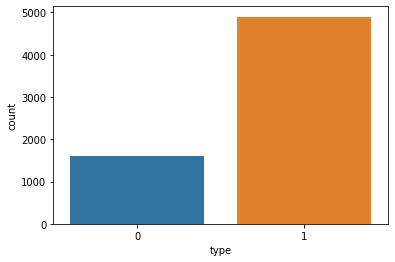

In [73]:
print(data.head())
se.countplot(data['type'])

In [9]:
data.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [11]:
from sklearn.impute import SimpleImputer
si=SimpleImputer(missing_values=np.nan,strategy='mean')

In [15]:
df=si.fit_transform(data)

In [16]:
df

array([[ 1.   ,  7.   ,  0.27 , ...,  0.45 ,  8.8  ,  6.   ],
       [ 1.   ,  6.3  ,  0.3  , ...,  0.49 ,  9.5  ,  6.   ],
       [ 1.   ,  8.1  ,  0.28 , ...,  0.44 , 10.1  ,  6.   ],
       ...,
       [ 0.   ,  6.3  ,  0.51 , ...,  0.75 , 11.   ,  6.   ],
       [ 0.   ,  5.9  ,  0.645, ...,  0.71 , 10.2  ,  5.   ],
       [ 0.   ,  6.   ,  0.31 , ...,  0.66 , 11.   ,  6.   ]])

In [17]:
x=df[:,0]
y=df[:,1:]


In [18]:
print(y)

[[ 7.     0.27   0.36  ...  0.45   8.8    6.   ]
 [ 6.3    0.3    0.34  ...  0.49   9.5    6.   ]
 [ 8.1    0.28   0.4   ...  0.44  10.1    6.   ]
 ...
 [ 6.3    0.51   0.13  ...  0.75  11.     6.   ]
 [ 5.9    0.645  0.12  ...  0.71  10.2    5.   ]
 [ 6.     0.31   0.47  ...  0.66  11.     6.   ]]


In [26]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(y,x,test_size=0.3,random_state=0)

In [27]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x1_train=ss.fit_transform(x_train)
x1_test=ss.transform(x_test)

In [28]:
x1_train

array([[-0.02802151, -1.08105098, -0.40741857, ...,  0.11296885,
        -0.33589118, -0.94043953],
       [ 0.04779783, -0.72094224, -0.05747144, ..., -1.28054951,
         2.03812837,  1.34201499],
       [ 1.26090714, -1.26110536,  1.20233824, ..., -1.41326555,
        -0.50546401, -0.94043953],
       ...,
       [ 0.50271382, -0.06074287, -0.26743972, ..., -1.01511744,
        -1.43811455,  0.20078773],
       [ 1.26090714, -0.48086974,  0.08250742, ..., -0.48425331,
         0.2576137 ,  0.20078773],
       [ 0.50271382,  1.01958336,  0.15249684, ..., -0.15246322,
        -0.4206776 , -0.94043953]])

In [29]:
x1_test

array([[ 3.53548710e+00,  2.39347748e-01,  1.34231710e+00, ...,
         1.50648721e+00, -8.15319469e-02,  2.00787730e-01],
       [ 1.33672647e+00,  7.19492741e-01, -5.74714380e-02, ...,
         6.43832984e-01, -8.44609659e-01,  2.00787730e-01],
       [ 1.99436490e-01, -8.40978487e-01,  6.42422829e-01, ...,
        -8.61052044e-02,  5.11972941e-01, -9.40439528e-01],
       ...,
       [ 1.26090714e+00, -2.40797246e-01,  2.22486269e-01, ...,
        -5.50611324e-01,  8.51118591e-01,  1.34201499e+00],
       [ 5.02713818e-01, -7.24748940e-04,  2.92475696e-01, ...,
         4.66108298e-02,  5.96759353e-01,  1.34201499e+00],
       [-2.80215068e-02,  1.55974648e+00, -1.94718596e+00, ...,
         1.12968847e-01, -8.44609659e-01, -9.40439528e-01]])

In [34]:
from sklearn.tree import DecisionTreeClassifier

In [35]:
clf=DecisionTreeClassifier(max_depth=5)

In [36]:
clf.fit(x1_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [63]:
predtest=clf.predict(x1_test)
predtrain=clf.predict(x1_train)

In [64]:
predtest=np.array(predtest,dtype=int)
predtrain=np.array(predtrain,dtype=int)

In [65]:
predtrain.shape

(4547,)

In [66]:
from sklearn.metrics import accuracy_score
acctest=accuracy_score(y_test,predtest)
acctrain=accuracy_score(y_train,predtrain)

In [67]:
print(acctest,acctrain)

0.9846153846153847 0.9909830657576424


In [70]:
from sklearn.metrics import confusion_matrix
cmtest=confusion_matrix(y_test,predtest)
cmtrain=confusion_matrix(y_train,predtrain)

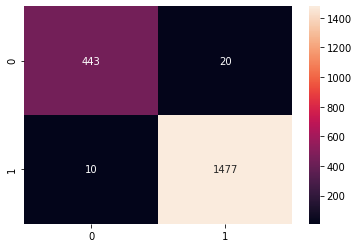

In [54]:
se.heatmap(cmtest,annot=True,fmt='.0f')

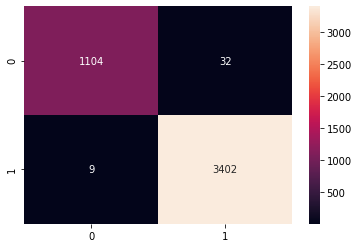

In [71]:
se.heatmap(cmtrain,annot=True,fmt='.0f')